Silhouette Score: 0.3161412197673119
Adjusted Rand Index: 0.00700172286186906
DBSCAN Davies-Bouldin Index: 2.0250698034375643


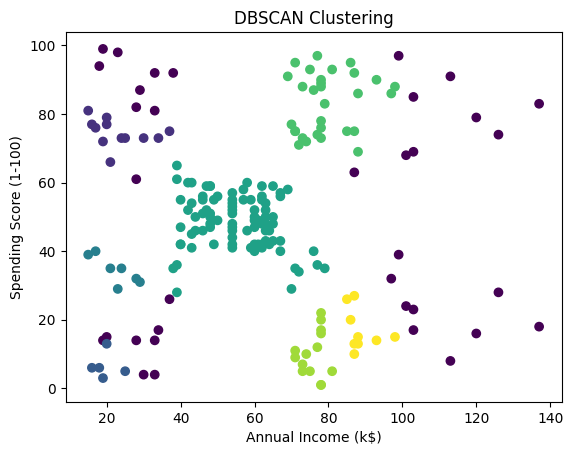

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)

dbscan.fit(X_scaled)

dbscan_silhouette = silhouette_score(X_scaled, dbscan.labels_)
dbscan_ari = adjusted_rand_score(data['Gender'], dbscan.labels_)
dbscan_dbi = davies_bouldin_score(X_scaled,dbscan.labels_ )


print("Silhouette Score:", dbscan_silhouette)
print("Adjusted Rand Index:", dbscan_ari)
print("DBSCAN Davies-Bouldin Index:", dbscan_dbi)

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=dbscan.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

Silhouette Score: 0.5546571631111091
Adjusted Rand Index: -0.0005805222810363258
K-means Adjusted Rand Index: 0.5722356162263351


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


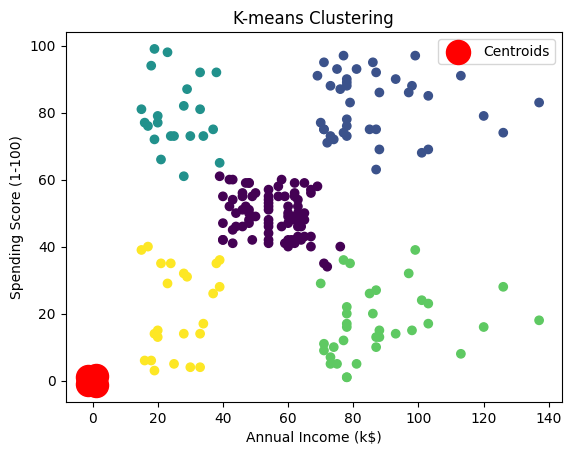

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

data = pd.read_csv('Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 5  
kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(X_scaled)

kmeans_silhouette = silhouette_score(X_scaled, kmeans.labels_)
kmeans_ari = adjusted_rand_score(data['Gender'], kmeans.labels_)
kmeans_dbi = davies_bouldin_score(X_scaled, kmeans.labels_)

print("Silhouette Score:", kmeans_silhouette)
print("Adjusted Rand Index:", kmeans_ari)
print("K-means Adjusted Rand Index:", kmeans_dbi)

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.legend()
plt.show()

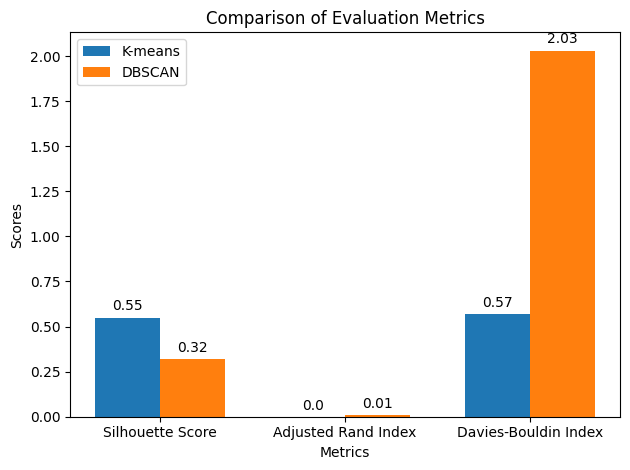

In [33]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Silhouette Score', 'Adjusted Rand Index', 'Davies-Bouldin Index']
kmeans_scores = [kmeans_silhouette,kmeans_ari,kmeans_dbi]
dbscan_scores = [dbscan_silhouette,dbscan_ari,dbscan_dbi]

decimal_places = 2

kmeans_scores = [round(score, decimal_places) for score in kmeans_scores]
dbscan_scores = [round(score, decimal_places) for score in dbscan_scores]

bar_positions = np.arange(len(metrics))

bar_width = 0.35

fig, ax = plt.subplots()

kmeans_bars = ax.bar(bar_positions - bar_width/2, kmeans_scores, bar_width, label='K-means')

dbscan_bars = ax.bar(bar_positions + bar_width/2, dbscan_scores, bar_width, label='DBSCAN')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics')
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

autolabel(kmeans_bars)
autolabel(dbscan_bars)

plt.tight_layout()
plt.show()


In [34]:
print('Overall Comparison:')

for i in range(len(metrics)):
    metric = metrics[i]
    kmeans_score = kmeans_scores[i]
    dbscan_score = dbscan_scores[i]
    
    comparison = 'K-means is better' if kmeans_score > dbscan_score else 'DBSCAN is better' if dbscan_score > kmeans_score else 'Both algorithms are comparable'
    print(f'{metric}: {comparison}')


Overall Comparison:
Silhouette Score: K-means is better
Adjusted Rand Index: DBSCAN is better
Davies-Bouldin Index: DBSCAN is better
